In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
## substitute string with key column to identify each document
key_id = 'locationAccordingTo'

In [3]:
## open data file
with open(os.path.join('dataset_metadata.csv'), 'r') as f:
    df = pd.read_csv(f)
    exercise = df

## treat data in listed column(s) as numeric
numeric_columns = ['dateIdentified'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()

,catalogNumber,sourceCategory,dateIdentified,database,language,observ,PDF,Corpus_PDF_references,References Endnote,associatedReferences,locationAccordingTo,Unnamed: 11
0,NS1517,Literature,1763.0,Psyl'list,English,freely available online,PDF,1763_Scopoli_1763_Chermes = Cacopsylla_pruni e...,Scopoli JA (1763),https://www.hemiptera-databases.org/psyllespdf...,Scopoli JA (1763) Entomologia Carniolica exhib...,NaN
1,NS0890,Literature,1805.0,BHL,German,freely available online,PDF,1805_Bechstein_extrait,Bechstein (1805),https://doi.org/10.5962/bhl.title.16563,Bechstein JM & Scharfenberg GL (1805) Vollstan...,NaN
2,NS1122,Literature,1837.0,BHL,English,freely available online,PDF,1837_Curtis_Cacopsylla_pruni_Britain_page_220,Curtis J (1837),https://doi.org/10.5962/bhl.title.46860,Curtis J (1837) A guide to an arrangement of B...,NaN
3,NS0891,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...,NaN
4,NS0892,Literature,1848.0,Psyl'list,German,freely available online,PDF,1848_Foerster_psyllids1,Foerster (1848),https://www.hemiptera-databases.org/psyllespdf...,Foerster A (1848) Uebersicht der gattungen und...,NaN


In [4]:
from visual import plot
# TODO associated database associatedreference

language
None
observ


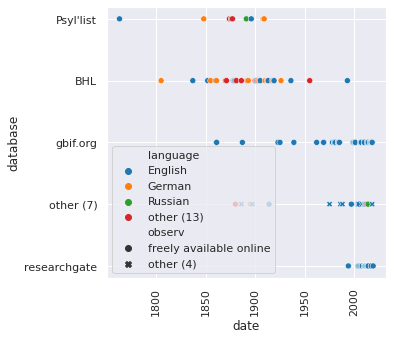

In [11]:
x = 'dateIdentified'
y = 'database'
hue = 'language'
style='observ'

plot(x=x, y=y, hue=hue, style=style, data=df,
    type='scatter',
    split={hue:4,style:2,y:5}, #slice_top={y:5},
    legend_position='lower left',
    drop_doubles=[key_id],
    xlabel='date', ylabel='database', huelabel='',
    sort_alpha=[hue]
    )

database


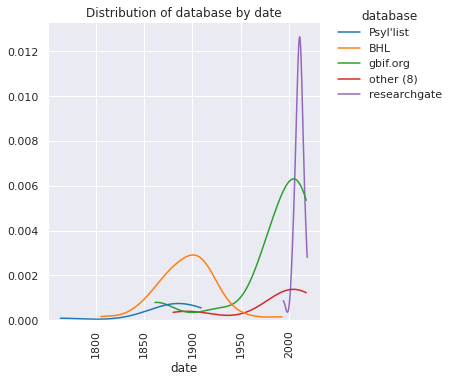

In [6]:
x = 'dateIdentified'
hue = 'database'

plot(x=x, hue=hue, data=df,
    type='dist',
    split={hue:5},
    legend_position=None, drop_na=[hue],
    drop_doubles=[key_id],
    xlabel='date', ylabel='', huelabel='database',
    )

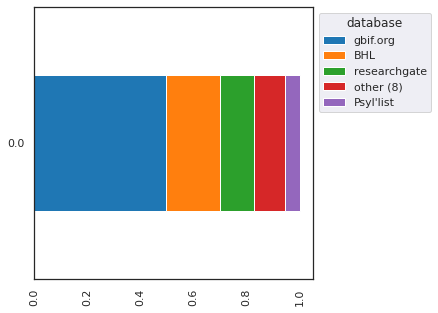

In [7]:
hue = 'database'
x='PDF'

plot(hue=hue, data=df,
    type='perc',
    split={hue:5},
    drop_doubles=[key_id], drop_na=[hue],
    legend_position='out',
    )

language


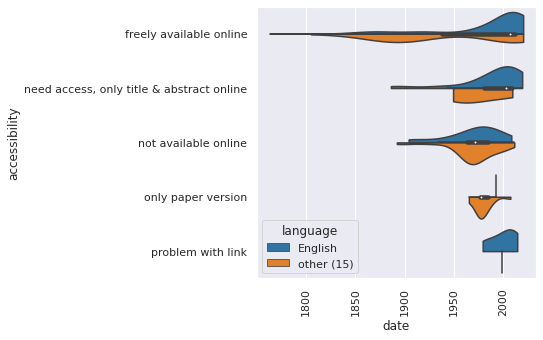

In [8]:
x = 'dateIdentified'
y = 'observ'
hue = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    split={hue:2},
    drop_doubles=[key_id], drop_na=[x],
    xlabel='date', ylabel='accessibility', huelabel='language',
    )

PDF


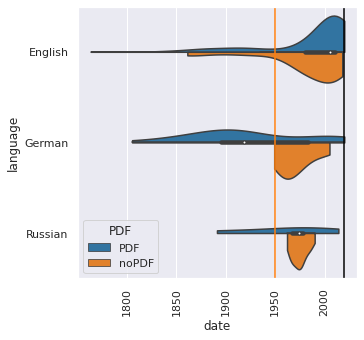

In [9]:
x = 'dateIdentified'
hue = 'PDF'
y = 'language'
palette = sns.color_palette('tab10',n_colors=2)

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    legend_position='lower left',
    slice_top={y:3},
    drop_doubles=[key_id], drop_na=[x],
    xlabel='date', ylabel='language', huelabel='pdf availability',
    vlines=[
        {'x':1950,'ymin':0,'ymax':1,'gid':'copyright', 'c':palette[1]},
        {'x':2020,'ymin':0,'ymax':1,'gid':'last publication', 'c':'black'}
        ],
    )
# German: copyright from 1950
# English: a lot of info in unvailable documents

observ


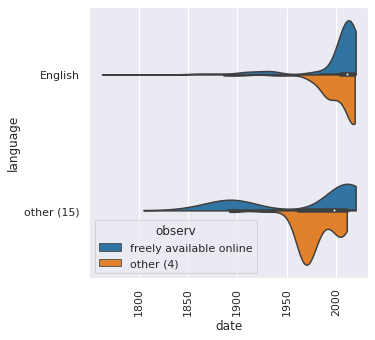

In [10]:
x = 'dateIdentified'
hue = 'observ'
y = 'language'

plot(x=x, y=y, hue=hue, data=df,
    type='violin',
    legend_position='lower left',
    split={hue:2,y:2}, 
    xlabel='date', ylabel='language', huelabel='online availability',
    )